In [737]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

%matplotlib inline

In [738]:
rel_type = 'discont'
#rel_type = 'sens'

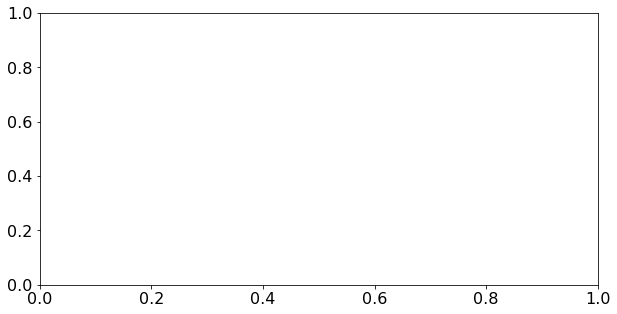

In [739]:
# do not change this, to be consistent between plots!
labelsize=20
ticksize=16
legendsize=10

f = plt.figure(figsize=(10, 5)) # TODO: change this

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif' 

#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#plt.grid(axis='y')

ax = plt.gca() 

#alpha = 0.97

#ax.yaxis.grid(True, color=(1,1,1))
#ax.set_facecolor((alpha, alpha, alpha))

#sns.set_style("dark")

# remove bounding lines
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)

plt.setp(ax.get_xticklabels(), fontsize=ticksize)
plt.setp(ax.get_yticklabels(), fontsize=ticksize)

#ax.tick_params(axis=u'both', which=u'both',length=0)

# https://colorbrewer2.org/#type=qualitative&scheme=Dark2&n=7 + print friendly
scheme1 = ["#1b9e77","#d95f02","#7570b3","#e7298a","#66a61e","#e6ab02","#a6761d"]
scheme2 = ["#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f"]
scheme3 = ["#e41a1c","#377eb8","#4daf4a","#984ea3","#ff7f00","#ffff33","#a65628"]
scheme4 = ["#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3","#fdb462","#b3de69"]

# we use scheme1 flipped!
scheme = list(reversed(scheme1))

# some random color for para
scheme += ['black']

# sorted by precision
official_name = {
    'box': 'Box',
    'hbox': 'hBox',
    'crown-ibp': 'CROWN-IBP',
    'pgram': 'Parallelogram',
    'zono': 'DeepZ',
    'triangle': 'Triangle',
    'dp': 'CROWN',
}
colors = {}

# add colors to domains
ii = 0
for k in official_name.keys():
    colors[k] = scheme[ii]
    ii += 1


In [740]:
if rel_type == 'sens':
    with open('/home/mislav/sri/optimization/imgs/1161.npz', 'rb') as f:
        npzfile = np.load(f)

        xs = npzfile['arr_0']
        box_lb = npzfile['arr_1']    
        zono_lb = npzfile['arr_2']
        sgd_box_path = npzfile['arr_3']
        sgd_zono_path = npzfile['arr_4']
else:
    with open('/home/mislav/sri/optimization/imgs/9726.npz', 'rb') as f:
        npzfile = np.load(f)

        xs = npzfile['arr_0']
        box_lb = npzfile['arr_1']    
        dp_lb = npzfile['arr_2']
        sgd_box_path = npzfile['arr_3']
        sgd_dp_path = npzfile['arr_4']


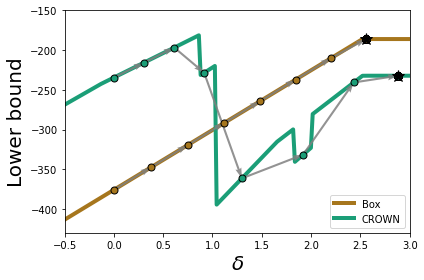

In [741]:
if rel_type == 'sens':
    plt.ylim(bottom=-190, top=-100)
    plt.xlim(left=-3.5, right=2.5)
else:
    plt.ylim(bottom=-430, top=-150)
    plt.xlim(left=-0.5, right=3)

color_sgd_points = 'gray'
marker_sgd = 'o'
lb_linewidth = 4
markersize_sgd = 7
k_sgd = 1


def plot_with_arrows(x, y, color):
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], 
               scale_units='xy', angles='xy', scale=1.0,
               color=color, zorder=10, alpha=0.85)
               #linewidth=2, linestyle='dashed', width=1, facecolor='none')
               #facecolor='none', 
               #width=0.0001, linestyle='dashed', linewidth=2)

plt.plot(xs, box_lb, label=official_name['box'], color=colors['box'], linewidth=lb_linewidth)
plot_with_arrows(sgd_box_path[::k_sgd, 0], sgd_box_path[::k_sgd, 1], color='gray') #colors['box'])

plt.xlabel('$\delta$', fontsize=labelsize)
plt.ylabel('Lower bound', fontsize=labelsize)



plt.plot(sgd_box_path[:-1, 0], sgd_box_path[:-1, 1], marker=marker_sgd, linestyle='None', 
         color=colors['box'], markeredgecolor='black', zorder=99, markersize=markersize_sgd)
plt.plot(sgd_box_path[-1:, 0], sgd_box_path[-1:, 1], marker='*', linestyle='None', 
         color='black', zorder=99, markersize=markersize_sgd+5)

if rel_type == 'sens':
    plt.plot(xs, zono_lb, label=official_name['zono'], color=colors['zono'], linewidth=lb_linewidth)
    plot_with_arrows(sgd_zono_path[::k_sgd, 0], sgd_zono_path[::k_sgd, 1], color='gray') #colors['zono'])
    plt.plot(sgd_zono_path[-1:, 0], sgd_zono_path[-1:, 1], marker='*', linestyle='None', 
             color='black', zorder=99, markersize=markersize_sgd)
    plt.plot(sgd_zono_path[:, 0], sgd_zono_path[:, 1], marker=marker_sgd, linestyle='None', 
             color=colors['zono'], markeredgecolor='black', zorder=99, markersize=markersize_sgd)
else:
    plt.plot(xs, dp_lb, label=official_name['dp'], color=colors['dp'], linewidth=lb_linewidth)
    plot_with_arrows(sgd_dp_path[::k_sgd, 0], sgd_dp_path[::k_sgd, 1], color='gray') #colors['dp'])
    plt.plot(sgd_dp_path[:, 0], sgd_dp_path[:, 1], marker='o', linestyle='None', 
             color=colors['dp'], markeredgecolor='black', zorder=99, markersize=markersize_sgd)
    plt.plot(sgd_dp_path[-1:, 0], sgd_dp_path[-1:, 1], marker='*', linestyle='None', 
             color='black', zorder=99, markersize=markersize_sgd+5)


"""
plt.plot(sgd_box_path[:, 0], sgd_box_path[:, 1], marker=marker_sgd, linestyle='None', color=color_sgd_points, zorder=9, markersize=2)
plt.plot(sgd_box_path[-1:, 0], sgd_box_path[-1:, 1], marker=marker_sgd, linestyle='None', color=color_sgd_points, zorder=9, markersize=2)
if rel_type == 'sens':
    sgd_zono_path = np.array(sgd_zono_path)
    plt.plot(sgd_zono_path[:, 0], sgd_zono_path[:, 1], marker=marker_sgd, linestyle='None', color=color_sgd_points, markersize=2)
    plt.plot(sgd_zono_path[-1:, 0], sgd_zono_path[-1:, 1], marker=marker_sgd, linestyle='None', color=color_sgd_points, markersize=2)
    for i in range(len(sgd_zono_path) - 1):
        x1, y1 = sgd_zono_path[i]
        x2, y2 = sgd_zono_path[i+1]
        plt.arrow(x1, y1, x2-x1, y2-y1, color='black') #, alpha=0.2)
else:
    sgd_dp_path = np.array(sgd_dp_path)
    plt.plot(sgd_dp_path[:, 0], sgd_dp_path[:, 1], marker='x', linestyle='None', color='black', markersize=2)
    plt.plot(sgd_dp_path[-1:, 0], sgd_dp_path[-1:, 1], marker='x', linestyle='None', color='black', markersize=markersize_sgd)
"""
    
plt.setp(ax.get_xticklabels(), fontsize=ticksize)
plt.setp(ax.get_yticklabels(), fontsize=ticksize)

plt.tight_layout()

plt.legend(loc='lower right', fontsize=legendsize)
if rel_type == 'sens':
    plt.savefig('sgd_zono.pdf')
else:
    plt.savefig('sgd_dp.pdf')
